In [1]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from aqua import Reader
from aqua.exceptions import NoDataError
from aqua.util import load_yaml, create_folder
from aqua.logger import log_configure
from aqua.graphics import plot_seasonalcycle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from   cartopy.util import add_cyclic_point
from seaice.colInterpolatOr import colInterpolatOr
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# regrid target
regrid = "r025"

In [16]:

# IFS-NEMO now
reader = Reader(model = "IFS-NEMO", exp = "historical-1990", source = "lra-r100-monthly", regrid = regrid)
data = reader.retrieve()
data = reader.regrid(data)

lat = data.coords["lat"]
lon = data.coords["lon"]
maskTime = (data['time.month'] == 3)
dataPlotIFSNEMOhist = data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("1990-01-01", "2019-12-31")).mean("time").values

data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2000-01-01", "2019-12-31")).mean("time").to_netcdf("seaice.thickness_IFS-NEMO_historical-1990_lra-r100-monthly_March2000-2019.nc")


2024-04-17 15:58:30 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


2024-04-17 15:58:30 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-04-17 15:58:30 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  variables = {
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshap

In [15]:
# IFS-NEMO future
reader = Reader(model = "IFS-NEMO", exp = "ssp370", source = "lra-r100-monthly", regrid = regrid)
data = reader.retrieve()
data = reader.regrid(data)

lat = data.coords["lat"]
lon = data.coords["lon"]
maskTime = (data['time.month'] == 3)
dataPlotIFSNEMOfut = data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2020-01-01", "2039-12-31")).mean("time").values

data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2020-01-01", "2039-12-31")).mean("time").to_netcdf("seaice.thickness_IFS-NEMO_ssp370_lra-r100-monthly_March2020-2039.nc")


2024-04-17 15:57:34 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


2024-04-17 15:57:34 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-04-17 15:57:34 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment ssp370, source lra-r100-monthly
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  variables = {
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is pr

In [14]:
# ICON present
reader = Reader(model = "ICON", exp = "historical-1990", source = "lra-r100-monthly", regrid = regrid)
data = reader.retrieve()
data = reader.regrid(data)

lat = data.coords["lat"]
lon = data.coords["lon"]
maskTime = (data['time.month'] == 3)
dataPlotICONhist = data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2000-01-01", "2019-12-31")).mean("time").values
data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2000-01-01", "2019-12-31")).mean("time").to_netcdf("seaice.thickness_ICON_historical_lra-r100-monthly_March2000-2019.nc")


2024-04-17 15:56:27 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  variables = {
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.con

In [13]:

# ICON future
reader = Reader(model = "ICON", exp = "ssp370", source = "lra-r100-monthly", regrid = regrid)
data = reader.retrieve()
data = reader.regrid(data)

lat = data.coords["lat"]
lon = data.coords["lon"]
maskTime = (data['time.month'] == 3)
dataPlotICONfut = data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2020-01-01", "2039-12-31")).mean("time").values
data["avg_sithick"].where(maskTime, drop=True).sel(time = slice("2020-01-01", "2039-12-31")).mean("time").to_netcdf("seaice.thickness_ICON_ssp370_lra-r100-monthly_March2020-2039.nc")


2024-04-17 15:55:24 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  variables = {
/home/b/b382385/.conda/envs/aqua/lib/python3.11/site-packages/xarray/core/dataset.py:6037: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option


In [12]:

# PIOMAS
reader = Reader(model = "PSC", exp = "PIOMAS", source = "monthly", regrid = regrid)
data = reader.retrieve()
data = reader.regrid(data)

lat = data.coords["lat"]
lon = data.coords["lon"]
maskTime = (data['time.month'] == 3)
dataPlotPIOMAShist = data["avg_sivol"].where(maskTime, drop=True).sel(time = slice("2000-01-01", "2019-12-31")).mean("time").values
data["avg_sivol"].where(maskTime, drop=True).sel(time = slice("2000-01-01", "2019-12-31")).mean("time").to_netcdf("seaice.thickness_PSC_PIOMAS_monthly_March2000-2019.nc")

# Tweak because PIOMAS has Nans in oceanic points that are outside its domain. We force zeros where PIOMAS is nan AND IFS is zero.
dataPlotPIOMAShistNew = dataPlotPIOMAShist

# 1 All points that are NaNs in IFS (land points) should be Nans in PIOMAS
dataPlotPIOMAShistNew[np.isnan(dataPlotIFSNEMOhist)] = np.nan
# 2 All points that are NaNs in PIOMAS but are >=0 in IFS should be zero (ocean points)
mask = np.isnan(dataPlotPIOMAShistNew) * (dataPlotIFSNEMOhist >= 0.0)
dataPlotPIOMAShistNew[mask] = 0.0
dataPlotPIOMAShist = dataPlotPIOMAShistNew

2024-04-17 15:53:27 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


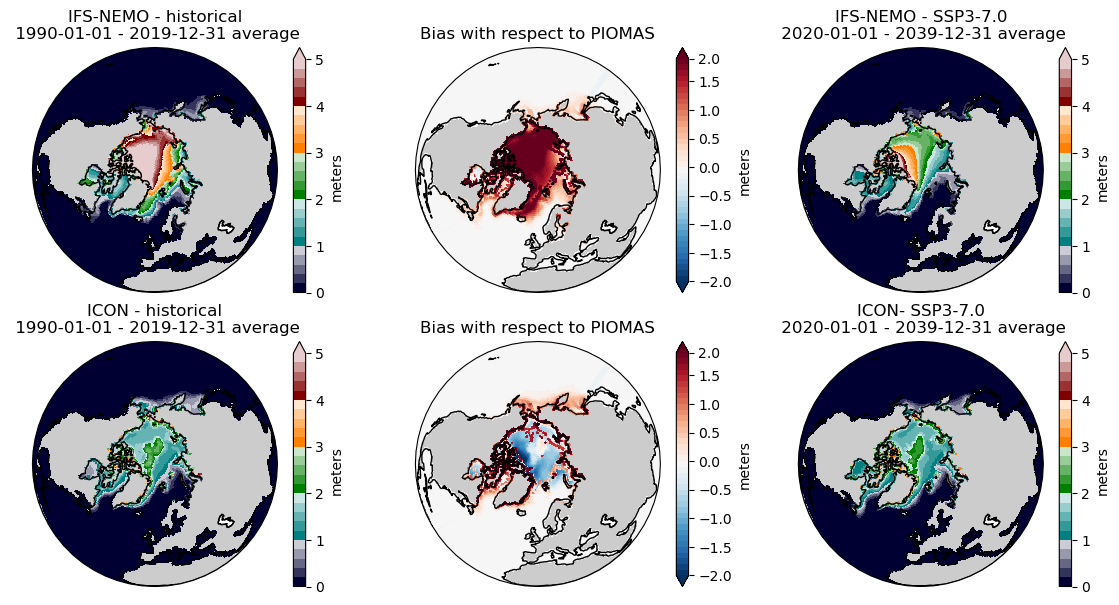

In [8]:
# Color settings
# Create color sequence for sit
masterColors = [[0.0, 0.0, 0.2],[0.0, 0.5, 0.5],[0.0, 0.5, 0.0], [1.0, 0.5, 0.0], [0.5, 0.0, 0.0] ]

listCol = list()
for m in masterColors:
    alpha = 0.80
    tmp = colInterpolatOr([m, [mm + alpha * (1 - mm) for mm in m]], 5)
    listCol += tmp
myCM = LinearSegmentedColormap.from_list('myCM', listCol, N = len(listCol))


# Projection settings
projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=90)

fig, ax = plt.subplots(nrows = 2, ncols = 3, 
                    subplot_kw={'projection': projection}, figsize=(7 * 2, 7))

levels     = np.arange(0.0, 5.05, 0.1)
levelsShow = np.arange(0.0, 5.05, 1.0)

levelsDiff = np.arange(-2.0, 2.0, 0.1)
levelsDiffShow = np.arange(-2.0, 2.5, 0.5)
myCmDiff = plt.cm.RdBu_r

# IFS hist
contour = ax[0, 0].contourf(lon, lat, dataPlotIFSNEMOhist,  \
                          transform=ccrs.PlateCarree(), cmap = myCM, levels = levels, extend = "max", vmin = np.min(levels), vmax = np.max(levels)
                          )
ax[0, 0].set_title("IFS-NEMO - historical\n 1990-01-01 - 2019-12-31 average")
cbar = plt.colorbar(contour, ax=ax[0, 0], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsShow)

# IFS bias
biasIFS = dataPlotIFSNEMOhist - dataPlotPIOMAShist

contour = ax[0, 1].contourf(lon, lat, biasIFS,  \
                          transform=ccrs.PlateCarree(), cmap = myCmDiff, levels = levelsDiff, extend = "both",
                          )
ax[0, 1].set_title("Bias with respect to PIOMAS")
cbar = plt.colorbar(contour, ax=ax[0, 1], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsDiffShow)

# PIOMAS state
#contour = ax[0, 1].contourf(lon, lat, dataPlotPIOMAShist,  \
#                          transform=ccrs.PlateCarree(), cmap = myCM, levels = levels, extend = "max",
#                          )
#ax[0, 1].set_title("PIOMAS")
#cbar = plt.colorbar(contour, ax=ax[0, 1], orientation='vertical', pad=0.05)
#cbar.set_label('meters')
#cbar.set_ticks(levelsShow)

# IFS fut
contour = ax[0, 2].contourf(lon, lat, dataPlotIFSNEMOfut,  \
                          transform=ccrs.PlateCarree(), cmap = myCM, levels = levels, extend = "max", vmin = np.min(levels), vmax = np.max(levels)
                          )
ax[0, 2].set_title("IFS-NEMO - SSP3-7.0\n 2020-01-01 - 2039-12-31 average")
cbar = plt.colorbar(contour, ax=ax[0, 2], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsShow)


# ICON hist
contour = ax[1, 0].contourf(lon, lat, dataPlotICONhist,  \
                          transform=ccrs.PlateCarree(), cmap = myCM, levels = levels, extend = "max", vmin = np.min(levels), vmax = np.max(levels)
                          )
ax[1, 0].set_title("ICON - historical\n 1990-01-01 - 2019-12-31 average")
cbar = plt.colorbar(contour, ax=ax[1, 0], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsShow)

# ICON bias
biasICON = dataPlotICONhist - dataPlotPIOMAShist

contour = ax[1, 1].contourf(lon, lat, biasICON,  \
                          transform=ccrs.PlateCarree(), cmap = myCmDiff, levels = levelsDiff, extend = "both",
                          )
ax[1, 1].set_title("Bias with respect to PIOMAS")
cbar = plt.colorbar(contour, ax=ax[1, 1], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsDiffShow)

# ICON fut
contour = ax[1, 2].contourf(lon, lat, dataPlotICONfut,  \
                          transform=ccrs.PlateCarree(), cmap = myCM, levels = levels, extend = "max", vmin = np.min(levels), vmax = np.max(levels)
                          )
ax[1, 2].set_title("ICON- SSP3-7.0\n 2020-01-01 - 2039-12-31 average")
cbar = plt.colorbar(contour, ax=ax[1, 2], orientation='vertical', pad=0.05)
cbar.set_label('meters')
cbar.set_ticks(levelsShow)
# Operations common to all axes:

for a in ax.flatten():
    a.coastlines(linewidth = 1)
    a.add_feature(cfeature.LAND, edgecolor='k', facecolor = [0.8, 0.8, 0.8])

    # Add colorbar
    #cbar = plt.colorbar(contour, ax=a, orientation='vertical', pad=0.05)
    #cbar.set_label('meters')
    #cbar.set_ticks(levelsShow)


fig.savefig("./seaice.thickness.all_models.png", dpi = 300)
fig.savefig("./seaice.thickness.all_models.pdf"           )




In [9]:
dataPlotPIOMAShist.to_netcdf("test.nc")


type: 'numpy.ndarray' object has no attribute 'to_netcdf'